승객의 나이, 성별, 승객 등급, 승선 위치 같은 속서을 기반으로 하여 승객의 생존 여부를 예측하는 것

In [165]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

if not os.path.isdir(TITANIC_PATH):
    os.makedirs(TITANIC_PATH, exist_ok=True)

for filename in ("train.csv", "test.csv"):
    filepath = os.path.join(TITANIC_PATH, filename)
    print("DownLoading", filename)
    urllib.request.urlretrieve(DOWNLOAD_URL + filename,filepath)

DownLoading train.csv
DownLoading test.csv


In [166]:
import pandas as pd

train_data  = pd.read_csv(TITANIC_PATH +"/train.csv")
test_data = pd.read_csv(TITANIC_PATH+ "/test.csv")

In [167]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터가 잘 저장 되어 있는지 확인하는 과정

In [168]:
train_data.info()
train_data.set_index('PassengerId', inplace= True)
test_data.set_index('PassengerId', inplace= True)
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [170]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
train_data["Survived"].value_counts()
print([train_data[i].value_counts() for i in ["Pclass","Sex","Cabin","Embarked"]])


[3    491
1    216
2    184
Name: Pclass, dtype: int64, male      577
female    314
Name: Sex, dtype: int64, B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64, S    644
C    168
Q     77
Name: Embarked, dtype: int64]


In [172]:
import numpy as np

mean_age=np.mean(train_data["Age"])
print(f"{mean_age}")

29.69911764705882


In [173]:
train_data["Age"].fillna(mean_age, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                          # ("scaler",StandardScaler())
                        ])
cat_pipeline = Pipeline([("Imputer",SimpleImputer(strategy="most_frequent")),
                         ("cat_encoding",OneHotEncoder(sparse=False))
                        ])

num_attribs = ["Age", "SibSp","Parch","Fare"]
cat_attribs = ["Pclass","Sex","Embarked"]

preprocess_pipline = ColumnTransformer([("num",num_pipeline,num_attribs),
                                        ("cat",cat_pipeline,cat_attribs)
                                        ])
X_train = preprocess_pipline.fit_transform(train_data[num_attribs+cat_attribs])
X_train

c:\Users\WSU\anaconda3\envs\py311\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[22.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [175]:
y_train = train_data["Survived"]

In [176]:
from sklearn.ensemble import RandomForestClassifier

ensemble_m = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_m.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [177]:
X_test= preprocess_pipline.transform(test_data[num_attribs+cat_attribs])
y_pred = ensemble_m.predict(X_test)

In [178]:
from sklearn.model_selection import cross_val_score

forest_score = cross_val_score(ensemble_m, X_train, y_train, cv=10)
forest_score.mean()

0.8115355805243445

In [179]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train,y_train)

SVC(gamma='auto')

In [180]:
svm_score = cross_val_score(svm_clf, X_train,y_train, cv=10)
svm_score.mean()

0.7374531835205992

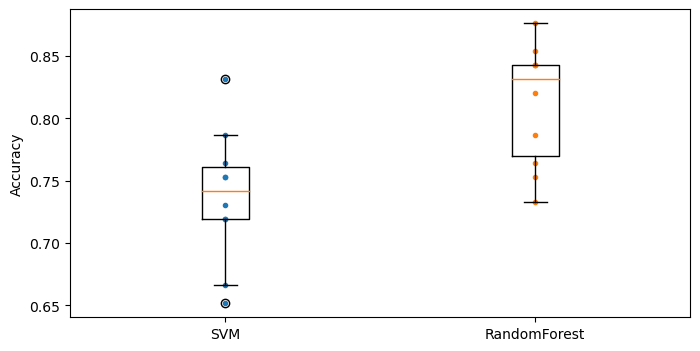

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_score, ".")
plt.plot([2]*10, forest_score, ".")
plt.boxplot([svm_score, forest_score],labels=("SVM","RandomForest"))
plt.ylabel("Accuracy")

plt.show()